In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt

simpleclean = pd.read_csv("origin_simpleclean.csv", names=["origin", "cleaned"], header=None)
simpleclean

,origin,cleaned
0,http://017uk.cf/2015/07/,017ukcf201507
1,http://1000.menu/catalog/pasternak,1000menucatalogpasternak
2,http://1007.show758.com/,1007show758com
3,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,1008643rmsncomldDvQPxAuuXlOKv4UvMDiEi4jVUCUwsO...
4,http://1019ampradio.cbslocal.com/tag/johnny-gi...,1019ampradiocbslocalcomtagjohnnygill2
...,...,...
60740,https://zh.wikipedia.org/wiki/Category:%E8%82%...,zhwikipediaorgwikiCategoryE882B2E7A9BAE59CB0E7...
60741,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,zhwikipediaorgzhhkE5A19EE588A9E7B1B3E880B6E6B8...
60742,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,zhwikipediaorgzhtwE6ADA3E7BEA9E881AFE79B9F
60743,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,zhwiktionaryorgwikiD181D0BDD0BED188D0B5D0BDD0B...


In [8]:
import pandas as pd
import re
import matplotlib.pyplot as plt

murmurhash = pd.read_csv("hash128bit.csv", names=["cleaned", "hashed128", "hashed64", "hashed32", "murmur64", "murmur128"], header=None)
murmurhash = murmurhash[1:].reset_index().drop(["index", "hashed128", "hashed64", "hashed32","cleaned"], axis=1)
murmurhash

,murmur64,murmur128
0,12383689904315227775,95776486458888438876963144965215827068
1,14847549755115702274,166119133413695325174097123011018490149
2,4413029452332922801,1557949192117982059516528417897537343240
3,2187224946339332517,57315490944069770776759844981219993770
4,341916866332096438,145874830757089626436379533461352379940
...,...,...
60740,931812346139600488,91114625688312237165193402374842926658
60741,2990979803409468330,960899001603440224511291513014180624428
60742,742396501703204907,822304963054689439417395524333178363517
60743,7904626550956024131,729421513577951447414974419120627970152


In [9]:
murmurhash["origin"] = simpleclean.origin
murmurhash["origin size"] = murmurhash.origin.apply(lambda x : len(x))
murmurhash["murmur64 size"] = murmurhash.murmur64.apply(lambda x : len(x))
murmurhash["murmur128 size"] = murmurhash.murmur128.apply(lambda x : len(x))
murmurhash

,murmur64,murmur128,origin,origin size,murmur64 size,murmur128 size
0,12383689904315227775,95776486458888438876963144965215827068,http://017uk.cf/2015/07/,24,20,38
1,14847549755115702274,166119133413695325174097123011018490149,http://1000.menu/catalog/pasternak,34,20,39
2,4413029452332922801,1557949192117982059516528417897537343240,http://1007.show758.com/,24,19,40
3,2187224946339332517,57315490944069770776759844981219993770,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,236,19,38
4,341916866332096438,145874830757089626436379533461352379940,http://1019ampradio.cbslocal.com/tag/johnny-gi...,51,18,39
...,...,...,...,...,...,...
60740,931812346139600488,91114625688312237165193402374842926658,https://zh.wikipedia.org/wiki/Category:%E8%82%...,75,18,38
60741,2990979803409468330,960899001603440224511291513014180624428,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,94,19,39
60742,742396501703204907,822304963054689439417395524333178363517,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,67,18,39
60743,7904626550956024131,729421513577951447414974419120627970152,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,79,19,39


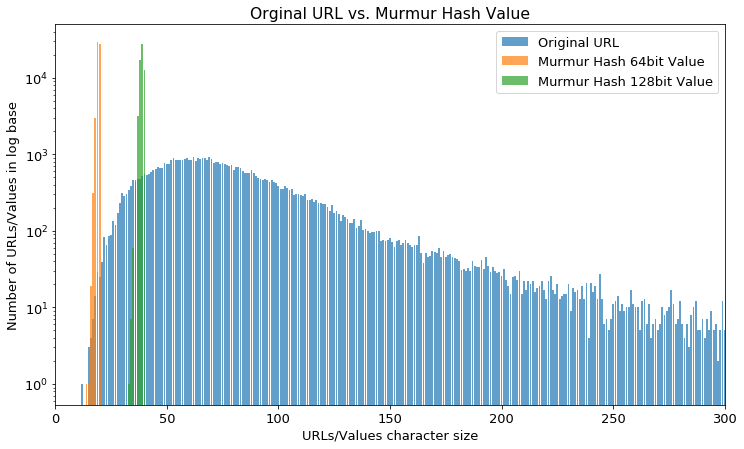

In [10]:
import matplotlib 
import matplotlib.pyplot as plt
font = {'size' : 13}

plt.rc('font', **font)

plt.figure(figsize=(12,7))
plt.xlabel('URLs/Values character size')
plt.title("Orginal URL vs. Murmur Hash Value")
plt.ylabel('Number of URLs/Values in log base')
plt.xlim(right = 300)
# plt.xscale("log")
plt.yscale("log")
plt.bar(list(murmurhash.groupby("origin size").count().index), list(murmurhash.groupby("origin size")["origin"].count()), alpha = 0.7)
plt.bar(list(murmurhash.groupby("murmur64 size").count().index), list(murmurhash.groupby("murmur64 size")["origin"].count()), alpha = 0.7)
plt.bar(list(murmurhash.groupby("murmur128 size").count().index), list(murmurhash.groupby("murmur128 size")["origin"].count()), alpha = 0.7)
plt.legend(('Original URL', 'Murmur Hash 64bit Value', "Murmur Hash 128bit Value"))
plt.savefig('original_vs_Murmur.png')